<a href="https://colab.research.google.com/github/AdrianRuber/03MIAR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nombre: Adrián Ruber

Link: https://colab.research.google.com/drive/1xMHtlLmu1g88wz1tJw44qs916HLnKcWy?usp=sharing

Github: https://github.com/AdrianRuber/03MIAR---Algoritmos-de-Optimizacion.git

In [ ]:
!pip install requests    #Hacer llamadas http a paginas de red externas
!pip install tsplib95    #Modulo para las instancias del problema del TSP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import tsplib95       #Modulo para las instancias del problema del TSP
import random         #Genera valores aleatorios
import math           #Modulo de funciones matematicas. Se usa para la función exponencial
import copy           #Copiar estructuras de datos
import urllib.request #Hacer llamadas http a paginas de la red


In [ ]:
#Descarga del fichero de datos
file = "swiss42.tsp" ; 
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos 

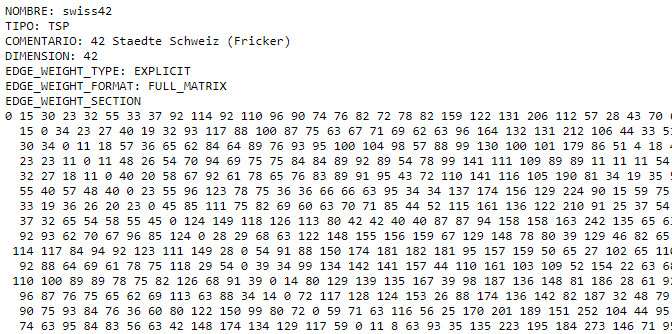

In [ ]:
#Carga de datos
problema = tsplib95.load(file)
Nodos = list(problema.get_nodes())
print(problema)
Aristas = list(problema.get_edges())
problema.get_weight(0, 2) #Fila , Columna

NAME: swiss42
COMMENT: 42 Staedte Schweiz (Fricker)
TYPE: TSP
DIMENSION: 42
EDGE_WEIGHT_TYPE: EXPLICIT
EDGE_WEIGHT_FORMAT: FULL_MATRIX
EDGE_WEIGHT_SECTION:
0 15 30 23 32 55 33 37 92 114 92 110 96 90 74 76 82 67 72 78 82 159 122 131 206 112 57 28 43 70 65 66 37 103 84 125 129 72 126 141 183 124
15 0 34 23 27 40 19 32 93 117 88 100 87 75 63 67 71 69 62 63 96 164 132 131 212 106 44 33 51 77 75 72 52 118 99 132 132 67 139 148 186 122
30 34 0 11 18 57 36 65 62 84 64 89 76 93 95 100 104 98 57 88 99 130 100 101 179 86 51 4 18 43 45 95 45 115 93 152 159 100 112 114 153 94
23 23 11 0 11 48 26 54 70 94 69 89 75 84 84 89 92 89 54 78 99 141 111 109 190 89 44 11 29 54 56 89 47 118 96 147 151 90 122 126 163 101
32 27 18 11 0 40 20 58 67 92 61 78 65 76 83 89 91 95 43 72 110 141 116 105 190 81 34 19 35 57 63 97 58 129 107 156 158 92 129 127 161 95
55 40 57 48 40 0 23 55 96 123 78 75 62 36 56 66 63 95 37 34 137 174 156 129 224 90 15 59 75 96 103 105 91 158 139 164 156 78 169 163 191 115
33 19 36 26 20 

30

In [ ]:
#Se genera una trayectoria aleatoria con comienzo en en el nodo 0
def crear_trayectoria(Nodos): 
  trayectoria = [Nodos[0]]
  for n in Nodos[1:]: #Se elige un nodo, diferente de 0, que no se haya elegido
    trayectoria = trayectoria + [random.choice(list(set(Nodos) - set(trayectoria)))]
  return trayectoria 

#Devuelve la distancia entre dos nodos
def distancia(a,b, problema):
  return problema.get_weight(a,b)

#Devuelve la distancia total de una trayectoria. Es la función a optimizar
def distancia_total(trayectoria, problema):
  distancia_total = 0
  for i in range(len(trayectoria)-1): #Se recorre secuencialmente todos los pasos, calculando la distancia de un nodo al siguiente, añadiendo la aristas a la distancia total
    distancia_total += distancia(trayectoria[i] ,trayectoria[i+1] ,  problema)
  return distancia_total + distancia(trayectoria[len(trayectoria)-1] ,trayectoria[0], problema)

In [ ]:
trayectoria_aleatoria = crear_trayectoria(Nodos)
distancia_total(trayectoria_aleatoria, problema)

4916

Busqueda Aleatoria
  - Hacer una iteración de la generación de solución aleatoria y guardar la mejor

In [ ]:
def busqueda_aleatoria(problema, N):
  #N es el numero de iteraciones
  Nodos = list(problema.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto
  
  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    trayectoria = crear_trayectoria(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(trayectoria, problema)  #Calcula el valor objetivo(distancia total)
    
    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = trayectoria
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

    
#Busqueda aleatoria con 5000 iteraciones    
solucion = busqueda_aleatoria(problema, 5000)    

Mejor solución: [0, 15, 2, 11, 26, 32, 13, 19, 18, 5, 8, 29, 22, 34, 33, 10, 4, 16, 41, 39, 24, 21, 23, 28, 35, 3, 25, 40, 30, 38, 12, 9, 14, 7, 6, 17, 27, 37, 1, 31, 36, 20]
Distancia     : 3746


Busqueda Local


In [ ]:
def genera_vecina(solucion):
  mejor_solucion = []
  mejor_distancia = float('inf')              #Inicializamos con un valor alto
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]   #Se intercambian los nodos para el operador de vecindad

      #Se evalua la nueva solución
      distancia_vecina = distancia_total(vecina, problema)         

      #Si es mejor se guarda
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problema))
 

nueva_solucion = genera_vecina(solucion) #Los resultados no son muy buenos porque solo se ha generado una iteración
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problema))

Distancia Solucion Incial: 3746
Distancia Mejor Solucion Local: 3448


In [ ]:
def busqueda_local(problem):
  mejor_solucion = []
  
  #Se genera una solución aleatoria
  solucion_referencia = crear_trayectoria(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1

    #Obtenemos la mejor vecina
    vecina = genera_vecina(solucion_referencia)

    #Se calcula el valro de la mejor solución vecina y se comprueba si es mejor, al principio mejorá
    distancia_vecina = distancia_total(vecina, problem)
 
    #Si no mejoramos hay que terminar se ha llegado a un minimo local
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina                   #Guarda la mejor solución
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion) 
      print("Distancia     :" , mejor_distancia) 
      return mejor_solucion
      
    solucion_referencia = vecina
 
 
sololucion_local = busqueda_local(problema)

En la iteracion  35 , la mejor solución encontrada es: [0, 6, 4, 2, 27, 32, 34, 33, 20, 35, 36, 17, 31, 8, 23, 41, 10, 25, 11, 12, 18, 13, 19, 14, 16, 15, 37, 7, 1, 3, 28, 29, 9, 39, 21, 40, 24, 22, 38, 30, 26, 5]
Distancia     : 1627


problemaproblemaproblemaproblemaproblemaproblemaproblemaproblemaproblemaRecorrido Simulado

In [ ]:
def genera_vecina_aleatorio(solucion): #

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2)) # Se realiza el salto de una vecindad a otra
  
  #Devuelve una nueva solución pero intercambiando dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  
 
#Funcion de probabilidad para aceptar peores soluciones, devuelve si tenemos que cambiar o no
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura de forma exponencial
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado(problem, TEMPERATURA ):
  
  solucion_referencia = crear_trayectoria(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []             #x* del pseudocodigo
  mejor_distancia = float('inf')  #F* del pseudocodigo
    
  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina aleatoria a partir de la solución inicial
    vecina =genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su distancia
    distancia_vecina = distancia_total(vecina, problem)
      
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de T y delta
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problema, 10000000)

La mejor solución encontrada es [0, 1, 3, 2, 27, 7, 37, 33, 20, 31, 34, 38, 22, 30, 4, 26, 6, 5, 13, 19, 14, 16, 15, 17, 36, 35, 32, 28, 29, 8, 39, 9, 24, 40, 21, 23, 41, 11, 18, 12, 25, 10]
con una distancia total de 1924


No mejora mucho la busqueda local, ya que se generan soluciones aleatorias